**Stroke Prediction**


1.   Exploratory data analysis (EDA) and dataset preprocessing  
2.   Selection of the machine learning model 
3.   Training  of the machine learning model 
4.   Accuracy of the machine learning model 
5.User input and prediction using the trained model 


**Stroke prediction dataset cleaning and model selection**

In [4]:
from google.colab import drive
drive.mount("/content/gdrive")
 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
ad1="/Project/healthcare-dataset-stroke-data.csv"
ad2="/data/stroke_data.csv"
data=pd.read_csv("/content/gdrive/MyDrive"+ad1)
start=data.copy()

**Dataset Appearance:**


In [6]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1




1.   Dataset contains data in string format .
2.   some of the values are missing in the dataset .




In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Gender attribute in the dataset contains 0.02% extreme outliers .**



In [8]:
before=data.gender.value_counts()

In [9]:
plt.style.use('fivethirtyeight')
fd={'fontsize':22,'fontweight':'bold'}

In [10]:
data.drop(data[data.gender=='Other'].index,inplace=True,axis=0)

In [11]:
after=data.gender.value_counts()
after

Female    2994
Male      2115
Name: gender, dtype: int64

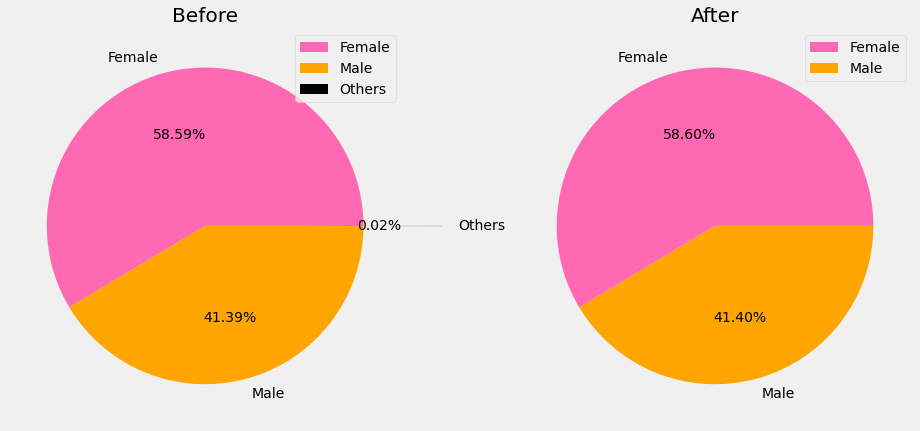

In [12]:
f, axs = plt.subplots(2,2,figsize=(13,13))
plt.subplot(1,2,1,title='Before')
plt.pie(before,explode=[0,0,0.5],labels=['Female','Male','Others'],colors=['hotpink','orange','black'],autopct='%.2f%%')
plt.legend()
plt.subplot(1,2,2,title='After')
plt.pie(after,explode=[0,0],labels=['Female','Male'],colors=['hotpink','orange'],autopct='%.2f%%')
plt.legend()
plt.tight_layout()
plt.show()

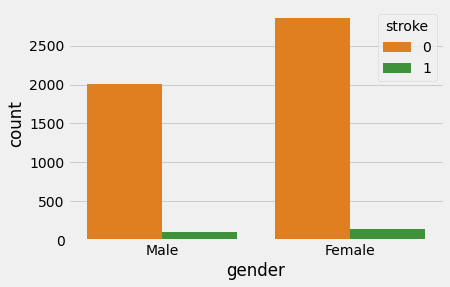

<Figure size 720x576 with 0 Axes>

In [13]:
sns.countplot(x=data.gender,hue=data.stroke,palette='Paired_r')
plt.figure(figsize=(10,8))
plt.show()

In [14]:
females_data=data[data.gender=='Female']
total_females=females_data.gender.value_counts()
females_data=females_data[females_data.stroke==1]

males_data=data[data.gender=='Male']
total_males=males_data.gender.value_counts()
males_data=males_data[males_data.stroke==1]



fs=int(females_data.stroke.value_counts())
ms=int(males_data.stroke.value_counts())

In [15]:
print(" Males   ",(int(ms)*100/int(total_males)),"%")
print(" Females ",(int(fs)*100/int(total_females)),"%")

 Males    5.1063829787234045 %
 Females  4.709418837675351 %


In [16]:
data.gender=pd.Categorical(data.gender,categories=['Female','Male'],ordered=True).codes

In [17]:
data.ever_married.value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

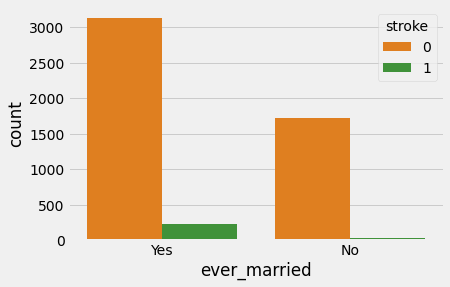

In [18]:
sns.countplot(x=data.ever_married,hue=data.stroke,palette='Paired_r')
plt.show()

In [19]:
data.ever_married=pd.Categorical(data.ever_married,categories=['No','Yes'],ordered=True).codes

**Worktype contains 5 categorical data ,which we split into 5 individual attributes  
[Private,Self-employed,child,Govt job,never worked]
 which are represented by 0's(False) and 1's(True)**

In [20]:
data.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

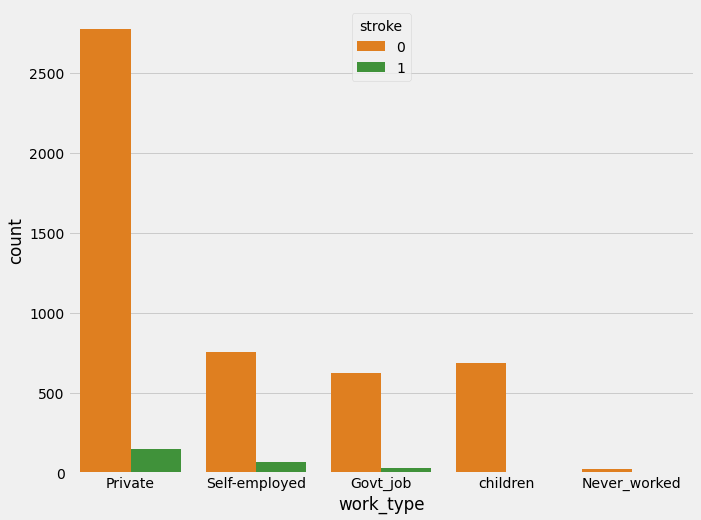

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x=data.work_type,hue=data.stroke,palette='Paired_r')
plt.show()

In [22]:
x=data.work_type.unique()
new_column=x.copy()
for i in range(len(x)):
    new_column[i]='wt_'+x[i]
    

In [23]:
for i in range(len(x)):
    temp=np.array(data.work_type==x[i])
    data[new_column[i]]=temp
    data[new_column[i]]=pd.Categorical(data[new_column[i]],categories=[False,True],ordered=True).codes

In [24]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

**Smoking status also contains 4 categorical data ,which we split into 4 individual attributes [never smoked,unknown ,formerly smoked,smokes] which are represented by 0's(False) and 1's(True)**

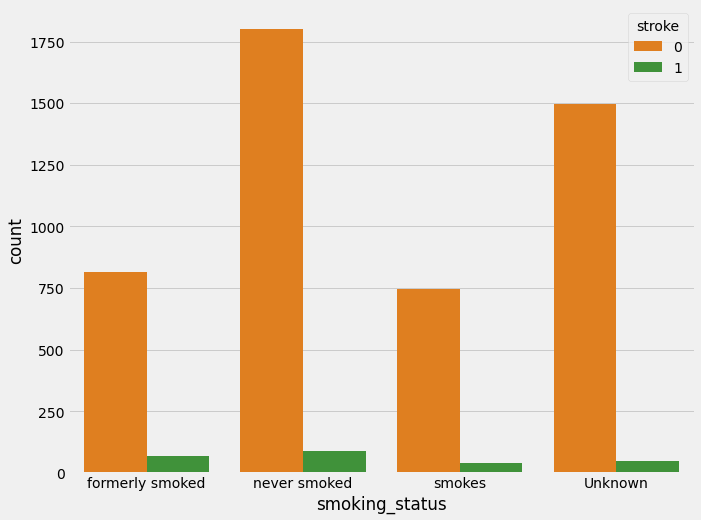

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x=data.smoking_status,hue=data.stroke,palette='Paired_r')
plt.show()

In [26]:
x=data.smoking_status.unique()
new_column=x.copy()
for i in range(len(x)):
    new_column[i]='ss_'+x[i]

In [27]:
for i in range(len(x)):
    temp=np.array(data.smoking_status==x[i])
    data[new_column[i]]=temp
    data[new_column[i]]=pd.Categorical(data[new_column[i]],categories=[False,True],ordered=True).codes

In [28]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,wt_Private,wt_Self-employed,wt_Govt_job,wt_children,wt_Never_worked,ss_formerly smoked,ss_never smoked,ss_smokes,ss_Unknown
0,9046,1,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1,1,0,0,0,0,1,0,0,0
1,51676,0,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1,0,1,0,0,0,0,1,0,0
2,31112,1,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1,1,0,0,0,0,0,1,0,0
3,60182,0,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1,1,0,0,0,0,0,0,1,0
4,1665,0,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Private,Urban,83.75,NaN,never smoked,0,1,0,0,0,0,0,1,0,0
5106,44873,0,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0,0,1,0,0,0,0,1,0,0
5107,19723,0,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0,0,1,0,0,0,0,1,0,0
5108,37544,1,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0,1,0,0,0,0,1,0,0,0


In [29]:
start

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Residence attribute represents the area of residence. **




In [30]:
data.Residence_type.value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

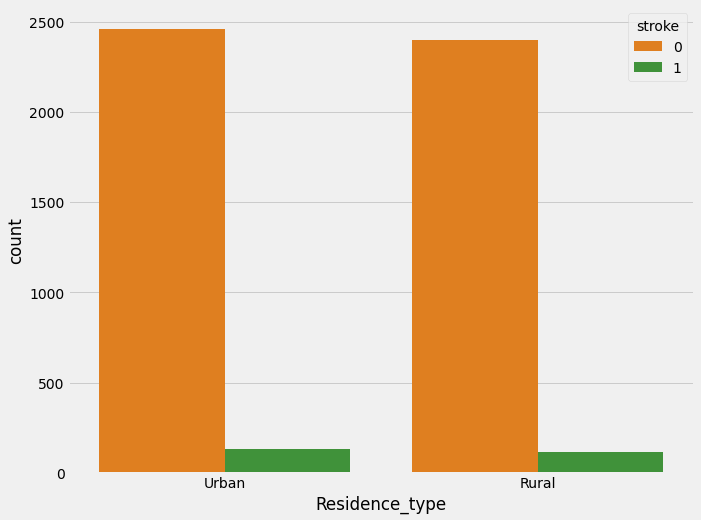

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(x=data.Residence_type,hue=data.stroke,palette='Paired_r')
plt.show()

In [32]:
data.Residence_type=pd.Categorical(data.Residence_type,categories=['Urban','Rural'],ordered=True).codes

**BMI attribute contains few missing values which are filled with the mean of the available BMI values**

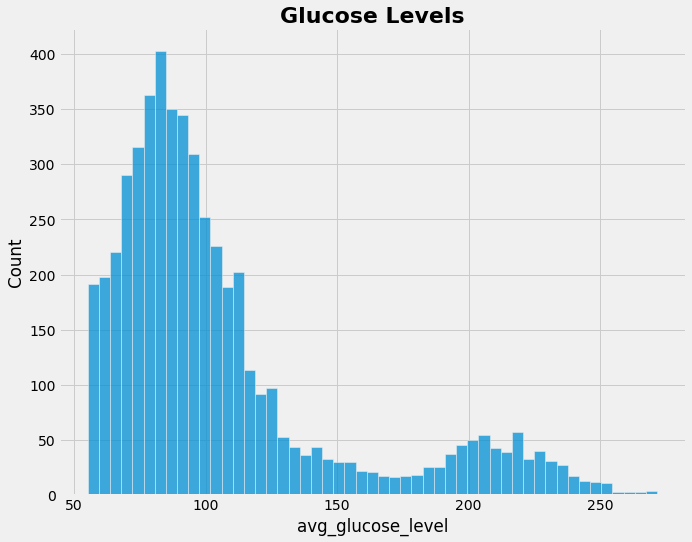

In [34]:
plt.figure(figsize=(10,8))
sns.histplot(data.avg_glucose_level)
plt.title('Glucose Levels',fontdict={'fontsize':22,'fontweight':'bold'})
plt.show()

In [ ]:
data.bmi.fillna(method='bfill',inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5109 non-null   int64  
 1   gender              5109 non-null   int8   
 2   age                 5109 non-null   float64
 3   hypertension        5109 non-null   int64  
 4   heart_disease       5109 non-null   int64  
 5   ever_married        5109 non-null   int8   
 6   work_type           5109 non-null   object 
 7   Residence_type      5109 non-null   int8   
 8   avg_glucose_level   5109 non-null   float64
 9   bmi                 5109 non-null   float64
 10  smoking_status      5109 non-null   object 
 11  stroke              5109 non-null   int64  
 12  wt_Private          5109 non-null   int8   
 13  wt_Self-employed    5109 non-null   int8   
 14  wt_Govt_job         5109 non-null   int8   
 15  wt_children         5109 non-null   int8   
 16  wt_Nev

In [ ]:

data.drop(['work_type'],axis=1,inplace=True)
data.drop(['smoking_status'],axis=1,inplace=True)


**The dataset before and after the data pre-processing is shown below.**

In [ ]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,wt_Private,wt_Self-employed,wt_Govt_job,wt_children,wt_Never_worked,ss_formerly smoked,ss_never smoked,ss_smokes,ss_Unknown
0,9046,1,67.0,0,1,1,0,228.69,36.6,1,1,0,0,0,0,1,0,0,0
1,51676,0,61.0,0,0,1,1,202.21,32.5,1,0,1,0,0,0,0,1,0,0
2,31112,1,80.0,0,1,1,1,105.92,32.5,1,1,0,0,0,0,0,1,0,0
3,60182,0,49.0,0,0,1,0,171.23,34.4,1,1,0,0,0,0,0,0,1,0
4,1665,0,79.0,1,0,1,1,174.12,24.0,1,0,1,0,0,0,0,1,0,0


In [ ]:
start.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5109 non-null   int64  
 1   gender              5109 non-null   int8   
 2   age                 5109 non-null   float64
 3   hypertension        5109 non-null   int64  
 4   heart_disease       5109 non-null   int64  
 5   ever_married        5109 non-null   int8   
 6   Residence_type      5109 non-null   int8   
 7   avg_glucose_level   5109 non-null   float64
 8   bmi                 5109 non-null   float64
 9   stroke              5109 non-null   int64  
 10  wt_Private          5109 non-null   int8   
 11  wt_Self-employed    5109 non-null   int8   
 12  wt_Govt_job         5109 non-null   int8   
 13  wt_children         5109 non-null   int8   
 14  wt_Never_worked     5109 non-null   int8   
 15  ss_formerly smoked  5109 non-null   int8   
 16  ss_nev

In [ ]:
data.corr()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,wt_Private,wt_Self-employed,wt_Govt_job,wt_children,wt_Never_worked,ss_formerly smoked,ss_never smoked,ss_smokes,ss_Unknown
id,1.000000,0.001929,0.003677,0.003610,-0.001253,0.013944,0.001219,0.000943,0.001489,0.006430,0.023545,-0.019879,0.000054,-0.013869,0.005471,0.007419,0.011567,0.001081,-0.019126
gender,0.001929,1.000000,-0.027752,0.021223,0.085685,-0.030171,0.006105,0.054722,-0.025871,0.009081,-0.032502,-0.026045,-0.016598,0.089226,0.011486,0.043121,-0.098952,0.011408,0.059557
age,0.003677,-0.027752,1.000000,0.276367,0.263777,0.679084,-0.014031,0.238323,0.318739,0.245239,0.116678,0.327949,0.129965,-0.634320,-0.078667,0.237347,0.119207,0.073075,-0.378366
hypertension,0.003610,0.021223,0.276367,1.000000,0.108292,0.164187,0.007980,0.174540,0.146766,0.127891,-0.005358,0.115417,0.017661,-0.129535,-0.021612,0.059022,0.065018,0.031213,-0.141551
heart_disease,-0.001253,0.085685,0.263777,0.108292,1.000000,0.114601,-0.003045,0.161907,0.042632,0.134905,0.000068,0.086742,0.001312,-0.091654,-0.015715,0.066938,-0.021893,0.044030,-0.066765
ever_married,0.013944,-0.030171,0.679084,0.164187,0.114601,1.000000,-0.005988,0.155329,0.329586,0.108299,0.154104,0.192637,0.133964,-0.544658,-0.090873,0.171960,0.102663,0.105132,-0.332335
Residence_type,0.001219,0.006105,-0.014031,0.007980,-0.003045,-0.005988,1.000000,0.004783,-0.004801,-0.015415,0.018005,-0.010508,-0.013056,0.002388,-0.022848,-0.008093,0.024622,-0.027185,0.002167
avg_glucose_level,0.000943,0.054722,0.238323,0.174540,0.161907,0.155329,0.004783,1.000000,0.167924,0.131991,0.016451,0.062770,0.013908,-0.102195,-0.014665,0.067796,0.024011,0.017716,-0.095035
bmi,0.001489,-0.025871,0.318739,0.146766,0.042632,0.329586,-0.004801,0.167924,1.000000,0.049935,0.203183,0.063453,0.075300,-0.431342,-0.028335,0.103614,0.102542,0.083975,-0.259260
stroke,0.006430,0.009081,0.245239,0.127891,0.134905,0.108299,-0.015415,0.131991,0.049935,1.000000,0.011927,0.062150,0.002660,-0.083888,-0.014885,0.064683,-0.004163,0.008920,-0.055924


**Below is a Heatmap to represent correlation between features.**

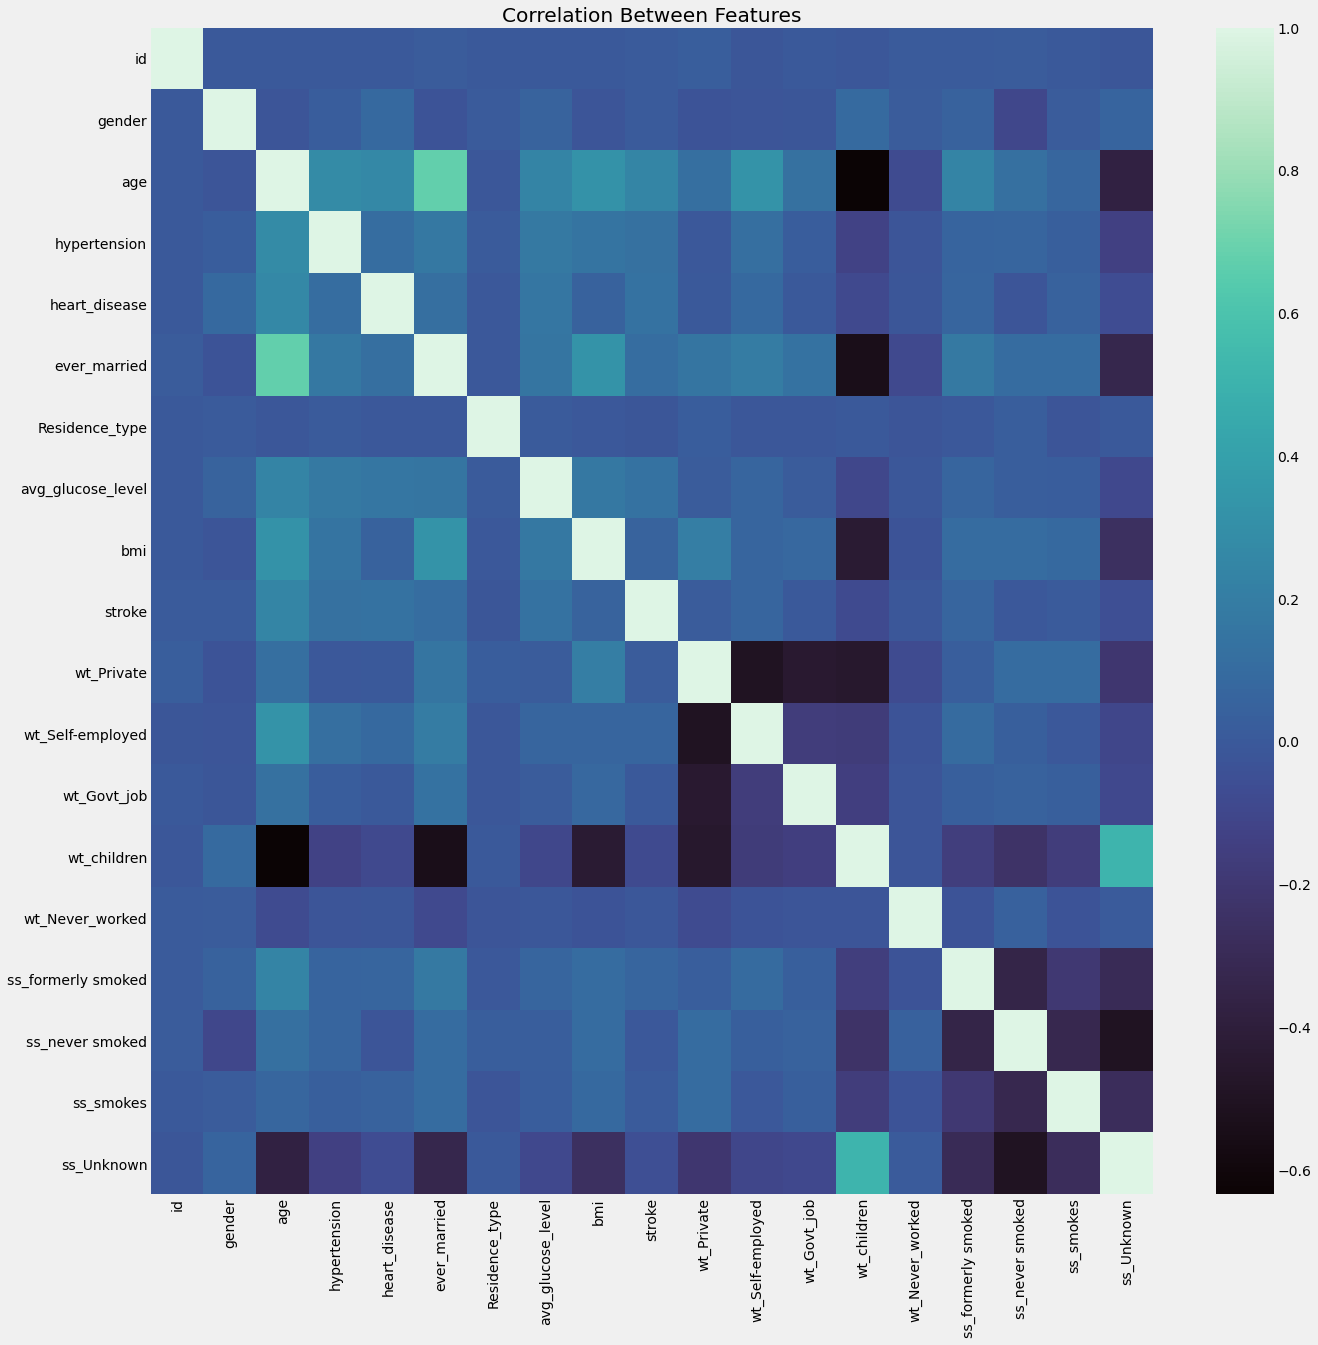

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),cmap='mako')
plt.title('Correlation Between Features')
plt.show();

In [ ]:
x=data.columns

In [ ]:
y=[]
for  i in x:
  if(i!='stroke' and i!='id'):
    y.append(i)
data_x=data[y]
data_y=data['stroke']
y.append('stroke')


In [ ]:
data=data[y]

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,wt_Private,wt_Self-employed,wt_Govt_job,wt_children,wt_Never_worked,ss_formerly smoked,ss_never smoked,ss_smokes,ss_Unknown,stroke
0,1,67.0,0,1,1,0,228.69,36.6,1,0,0,0,0,1,0,0,0,1
1,0,61.0,0,0,1,1,202.21,32.5,0,1,0,0,0,0,1,0,0,1
2,1,80.0,0,1,1,1,105.92,32.5,1,0,0,0,0,0,1,0,0,1
3,0,49.0,0,0,1,0,171.23,34.4,1,0,0,0,0,0,0,1,0,1
4,0,79.0,1,0,1,1,174.12,24.0,0,1,0,0,0,0,1,0,0,1


In [ ]:
data_x.head()


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,wt_Private,wt_Self-employed,wt_Govt_job,wt_children,wt_Never_worked,ss_formerly smoked,ss_never smoked,ss_smokes,ss_Unknown
0,1,67.0,0,1,1,0,228.69,36.6,1,0,0,0,0,1,0,0,0
1,0,61.0,0,0,1,1,202.21,32.5,0,1,0,0,0,0,1,0,0
2,1,80.0,0,1,1,1,105.92,32.5,1,0,0,0,0,0,1,0,0
3,0,49.0,0,0,1,0,171.23,34.4,1,0,0,0,0,0,0,1,0
4,0,79.0,1,0,1,1,174.12,24.0,0,1,0,0,0,0,1,0,0


In [ ]:
data_y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_x, data_y, test_size=0.3,random_state=56)
print(x_train.shape)
x_test.shape

(3576, 17)


(1533, 17)

In [ ]:
x_test.head()
print(type(x_test))
print(y_train.shape)
y_train.head()

<class 'pandas.core.frame.DataFrame'>
(3576,)


1785    0
2339    0
2846    0
4972    0
2604    0
Name: stroke, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

**Model selection :**


**LOGISTIC REGRESSION**

In [ ]:
#LOGISTIC REGRESSION
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

score = model.score(x_test, y_test)
print('Testing Score \n',score)
logistic_score = model.score(x_train, y_train)
logistic_test = model.score(x_test, y_test)
#== 
y_pred= model.predict(x_test)
print(classification_report(y_test, y_pred))
#== 
cm = confusion_matrix(y_test,y_pred)
print(cm)

Testing Score 
 0.9517286366601435
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1459
           1       0.00      0.00      0.00        74

    accuracy                           0.95      1533
   macro avg       0.48      0.50      0.49      1533
weighted avg       0.91      0.95      0.93      1533

[[1459    0]
 [  74    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM**


In [ ]:
svc = SVC(random_state=0)
svc.fit(x_train, y_train)
#== 
#Score 
#== 
svc_score = svc.score(x_train, y_train)
svc_test = svc.score(x_test, y_test)
#== 
#testing model 
#== 
y_pred = svc.predict(x_test)
#== 
#evaluation
#== 
cm = confusion_matrix(y_test,y_pred)
print('Training Score',svc_score)
print('Testing Score \n',svc_test)
print(cm)

Training Score 0.9510626398210291
Testing Score 
 0.9517286366601435
[[1459    0]
 [  74    0]]


**N- Features ------->LOGISTIC REGRESSION------->Classification**



**Training of the ML model**

**Z=XW+B** where x is the features and w is the weights 

**output=sigmoid(z)**

**Apply decision bouondary to output**

In [ ]:
def sigmoid(input):    
    output = 1 / (1 + np.exp(-input))
    return output

In [ ]:
init_parameters = {} 
init_parameters["weight"] = np.zeros(x_train.shape[1])
init_parameters["bias"] = 0.0

In [ ]:
def optimize(x, y,learning_rate,iterations,parameters): 
      size = x.shape[0]
      weight = parameters["weight"] 
      bias = parameters["bias"]
      for i in range(iterations): 
          sigma = sigmoid(np.dot(x, weight) + bias)
          loss = -1/size * np.sum(y * np.log(sigma)) + (1 - y) * np.log(1-sigma)
          dW = 1/size * np.dot(x.T, (sigma - y))
          db = 1/size * np.sum(sigma - y)
          weight -= learning_rate * dW
          bias -= learning_rate * db 
      
      parameters["weight"] = weight
      parameters["bias"] = bias
      return parameters

In [ ]:
def train(x, y, learning_rate,iterations):
    parameters_out = optimize(x, y, learning_rate, iterations ,init_parameters)
    return parameters_out

In [ ]:
parameters_out = train(x_train, y_train, learning_rate = 0.001, iterations = 1000)
parameters_out

{'bias': -0.016294971214070683,
 'weight': array([-0.00389676,  0.03644821,  0.00597173,  0.00417699, -0.00299398,
        -0.00938421, -0.00133123, -0.16149808, -0.00447183, -0.00112725,
        -0.00296405, -0.00748659, -0.00024524,  0.00181048, -0.00754206,
        -0.00127385, -0.00928954])}

**Testing the ML model**

**-Training Accuracy**

In [ ]:
output_values = np.dot(x_train, parameters_out["weight"]) + parameters_out["bias"]
predictions = sigmoid(output_values) >= 1/2
res = []
for x in predictions:
  if x == True:
    res.append(1)
  else:
    res.append(0)
corr = 0
for (val1,val2) in zip(res,y_train):
  if val1 == val2:
    corr+=1
print("Training Accuracy: "+str((corr/len(y_train))*100)+"%")

Training Accuracy: 95.0503355704698%


**-Testing Accuracy**

In [ ]:
out_values = np.dot(x_test, parameters_out["weight"]) + parameters_out["bias"]
predictions = sigmoid(out_values) >= 1/2
res = []
for x in predictions:
  if x == True:
    res.append(1)
  else:
    res.append(0)
corr = 0
for (val1,val2) in zip(res,y_test):
  if val1 == val2:
    corr+=1
print("Testing Accuracy: "+str((corr/len(y_test))*100)+"%")

Testing Accuracy: 95.17286366601435%


In [ ]:
#gener age hypertension ever married residencetype glucose level bmi worktype smoking 
ip_features =[ "Gender","Age","Hypertension","Married","Residence type","Glucose level","BMI","Work Type","Smoking Status"]

ip_optns={"Gender":"0 for Female , 1 for Male","Age":'-',"Hypertension":"0 if No Hypertension ,1 otherwise","Heart disease":"0 if no heart disease 1 otherwise","Married":"1 if Married ,0 otherwise","Residence type":"0 if Rural ,1 if Urban ","Glucose level":"-","BMI":"-","Work Type":"1 . Private job \n2.Self Employed \n3.Govt Job \n4.Child/Student\n5.Unemployed","Smoking Status":"\n1.Formerly smokes\n2.Never smoked\n3.Smokes currently \n4. Unknown"}


**User input and prediction**

In [ ]:
print("Enter the details as prompted :")
ip_data=np.zeros(17)
index=-1
for i in ip_optns.keys():
  index+=1
  x=float(input(i+"\nEnter "+ip_optns[i]+"\n\n\n"))
  if(i!="Work Type" and i!="Smoking Status"):
    ip_data[index]=x
  else:
    if(i=="Work Type"):
      ip_data[index+int(x)-1]=1;
      index+=4
    else:
      ip_data[index+int(x)-1]=1;

ip_data
      


Enter the details as prompted :


In [ ]:
def predict(ip_data):  
  res=sigmoid(np.dot(ip_data,parameters_out["weight"]) + parameters_out["bias"])
  print (res)
  if res>=1/2:
    return "Positive"
  else:
    return "Negative"

In [ ]:
predict(ip_data)

In [ ]:
model.predict(ip_data.reshape(-1,17))[0]